## Import dependencies

In [3240]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

## Reading the dataset

In [3241]:
data = pd.read_csv('spambase.data',header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## Checking for duplicate values

In [3242]:
duplicate = data[data.duplicated()]
duplicate

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
104,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
105,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
106,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4441,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4537,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4541,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


## Dropping duplicate data

In [3243]:
df = data.drop_duplicates()
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## Adding headers to the dataset

In [3244]:
df.columns = [
'word_freq_make',        
'word_freq_address',     
'word_freq_all',         
'word_freq_3d',          
'word_freq_our',         
'word_freq_over',        
'word_freq_remove',      
'word_freq_internet',    
'word_freq_order',       
'word_freq_mail',        
'word_freq_receive',     
'word_freq_will',        
'word_freq_people',      
'word_freq_report',      
'word_freq_addresses',   
'word_freq_free',        
'word_freq_business',    
'word_freq_email',       
'word_freq_you',         
'word_freq_credit',      
'word_freq_your',        
'word_freq_font',        
'word_freq_000',         
'word_freq_money',       
'word_freq_hp',          
'word_freq_hpl',         
'word_freq_george',      
'word_freq_650',         
'word_freq_lab',         
'word_freq_labs',        
'word_freq_telnet',      
'word_freq_857',         
'word_freq_data',        
'word_freq_415',         
'word_freq_85',          
'word_freq_technology',  
'word_freq_1999',        
'word_freq_parts',       
'word_freq_pm',          
'word_freq_direct',      
'word_freq_cs',          
'word_freq_meeting',     
'word_freq_original',    
'word_freq_project',     
'word_freq_re',          
'word_freq_edu',         
'word_freq_table',       
'word_freq_conference',  
'char_freq_;',           
'char_freq_(',           
'char_freq_[',           
'char_freq_!',           
'char_freq_$',           
'char_freq_#',           
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total', 
'spam_nospam' 
]

df

# with open('spambase.names') as spam:
#     text = spam.read()
# labels = re.findall(r'\n(\w*_?\W?):', text)
# # labels.append('Class')
# spamData = pd.read_csv('spambase.data', header=None, names=labels + ['spam'])

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_nospam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3245]:
# dataset = df.to_numpy()
# print(dataset.shape)

## Checking for any Null values

In [3246]:
df.isnull().values.any()

False

In [3247]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

## Getting a feature correlation plot

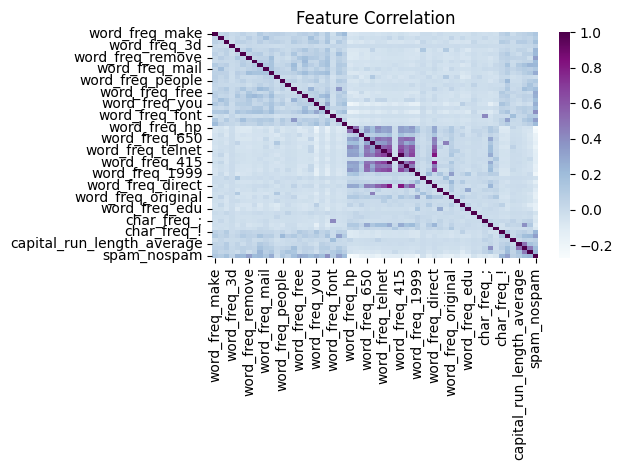

In [3248]:
# Get Feature Correlation
correlation = df.corr()
sn.heatmap(correlation,cmap="BuPu")
plt.title("Feature Correlation")
plt.tight_layout()
plt.show()

## Getting a pairplot

<Figure size 500x500 with 0 Axes>

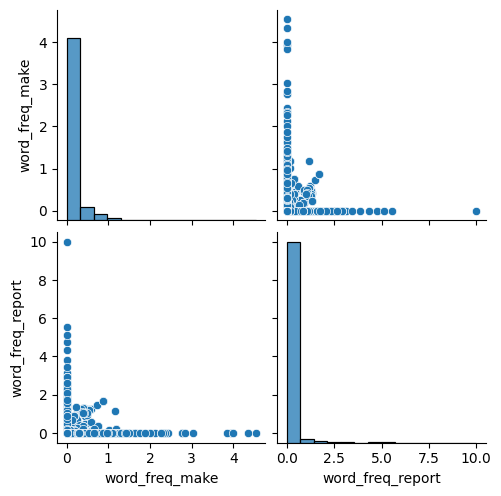

In [3249]:
fig = plt.figure(figsize = (5,5))
sn.pairplot(df[["word_freq_make","word_freq_report"]])

## Checking for outliers

<Figure size 10000x5000 with 0 Axes>

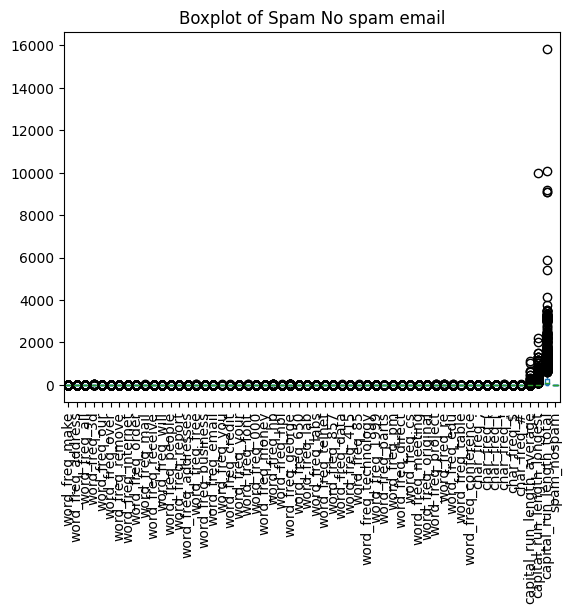

In [3250]:
fig = plt.figure(figsize =(100, 50))
df.plot.box(title='Boxplot of Spam No spam email',rot=90)

plt.show()

### Boxplot of capital_run_length_total

<AxesSubplot:xlabel='capital_run_length_total'>

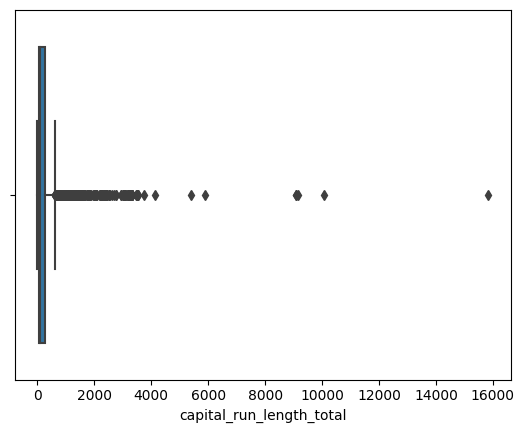

In [3251]:
sn.boxplot(x = df['capital_run_length_total'])


### Boxplot of capital_run_length_longest

<AxesSubplot:xlabel='capital_run_length_longest'>

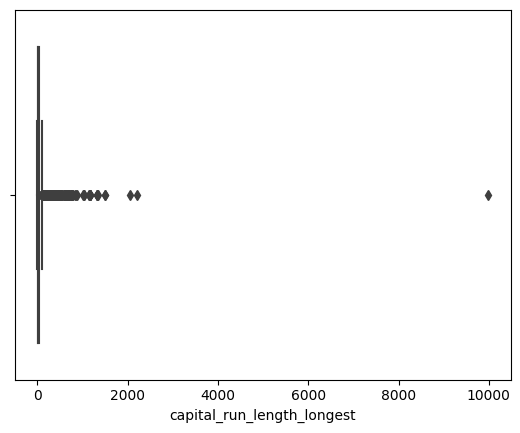

In [3252]:
sn.boxplot(x = df['capital_run_length_longest'])

### Boxplot of capital_run_length_average

<AxesSubplot:xlabel='capital_run_length_average'>

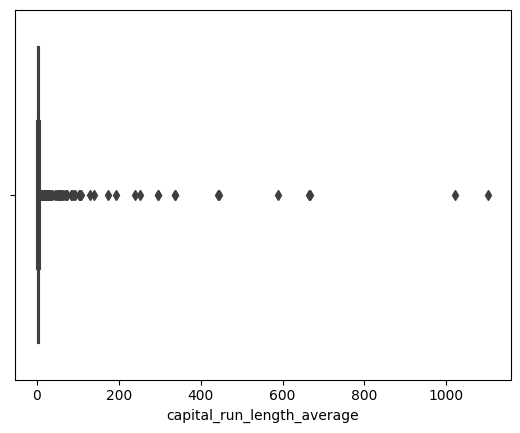

In [3253]:
sn.boxplot(x = df['capital_run_length_average'])

### Making all the outliers as Null values from IQR technique

In [3254]:
for x in ['capital_run_length_total','capital_run_length_longest','capital_run_length_average']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

/var/folders/zz/vz7cvvnd5ws3182279mslrc80000gn/T/ipykernel_56406/2705880470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[x] < min,x] = np.nan


### Boxplot of capital_run_length_total without outliers

<AxesSubplot:xlabel='capital_run_length_total'>

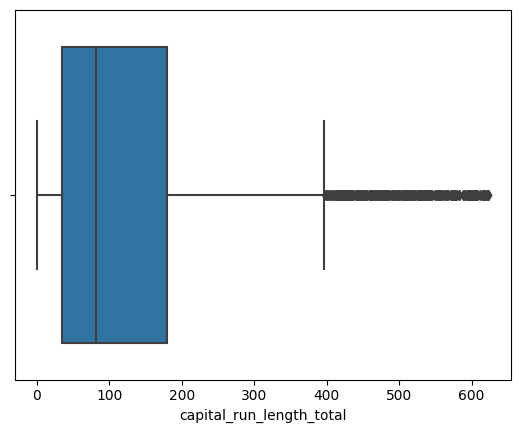

In [3255]:
sn.boxplot(x = df['capital_run_length_total'])

In [3256]:
# sn.boxplot(x = df['capital_run_length_longest'])

In [3257]:
# for x in ['capital_run_length_longest']:
#     q75,q25 = np.percentile(df.loc[:,x],[75,25])
#     intr_qr = q75-q25
 
#     max = q75+(1.5*intr_qr)
#     min = q25-(1.5*intr_qr)
 
#     df.loc[df[x] < min,x] = np.nan
#     df.loc[df[x] > max,x] = np.nan

### Boxplot of capital_run_length_longest without outliers

<AxesSubplot:xlabel='capital_run_length_longest'>

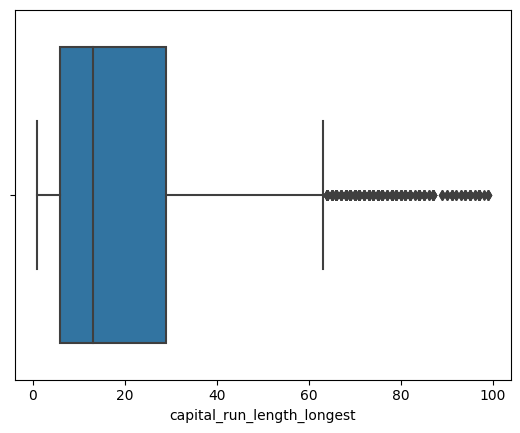

In [3258]:
sn.boxplot(x = df['capital_run_length_longest'])

### Boxplot of capital_run_length_average without outliers

<AxesSubplot:xlabel='capital_run_length_average'>

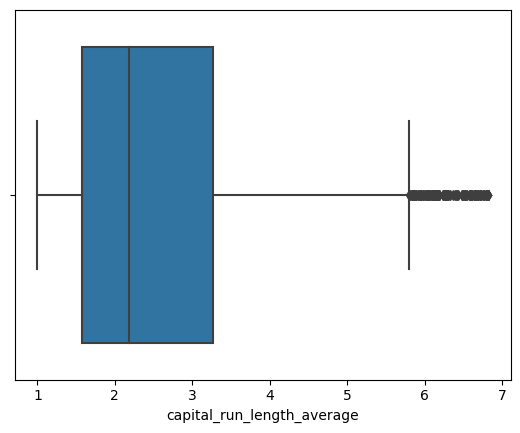

In [3259]:
sn.boxplot(x = df['capital_run_length_average'])

### Checking for Null values after turning all the outliers as Null values

In [3260]:
df.isnull().values.any()

True

In [3261]:
df.isnull().sum()

word_freq_make                  0
word_freq_address               0
word_freq_all                   0
word_freq_3d                    0
word_freq_our                   0
word_freq_over                  0
word_freq_remove                0
word_freq_internet              0
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             0
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab                   0
word_freq_labs

### Removing all the Null values

In [3262]:
# Drop all rows with NaN values
df2=df.dropna()
df2=df.dropna(axis=0)

# Reset index after drop
df2=df.dropna().reset_index(drop=True)

In [3263]:
df = df2
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_nospam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0,1
1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0,1
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0,1
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.0,1.142,3.0,88.0,0
3442,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.0,1.555,4.0,14.0,0
3443,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.0,1.404,6.0,118.0,0
3444,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.0,1.147,5.0,78.0,0


## Normalizing Dataset

In [3264]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_scale=scaler.fit_transform(df)

###  Before normalizing


In [3265]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_nospam
count,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,...,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000
mean,0.094779,0.092716,0.268056,0.005818,0.308175,0.085267,0.093688,0.096164,0.047841,0.201033,...,0.033385,0.147309,0.017294,0.233433,0.051662,0.033626,2.362797,18.532792,120.788160,0.324144
std,0.309801,0.474629,0.529981,0.134848,0.701947,0.281174,0.356036,0.420321,0.222685,0.581086,...,0.214935,0.244150,0.112672,0.793952,0.194241,0.459684,1.162791,18.751231,130.389669,0.468122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.508500,5.000000,31.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.054000,12.000000,76.000000,0.000000
75%,0.000000,0.000000,0.360000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.204000,0.000000,0.237000,0.000000,0.000000,2.909000,23.000000,155.000000,1.000000
max,4.540000,14.280000,5.100000,7.070000,10.000000,5.880000,7.270000,11.110000,5.260000,11.110000,...,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,6.822000,98.000000,623.000000,1.000000


###  Normalizing

In [3266]:
df_scale=pd.DataFrame(normalized_scale, index=df.index, columns=df.columns)
df = df_scale

###  After normalizing

In [3267]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_nospam
count,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,...,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000
mean,0.020877,0.006493,0.052560,0.000823,0.030817,0.014501,0.012887,0.008656,0.009095,0.018095,...,0.007613,0.027915,0.004238,0.007187,0.008606,0.001696,0.234077,0.180750,0.192585,0.324144
std,0.068238,0.033237,0.103918,0.019073,0.070195,0.047819,0.048973,0.037833,0.042336,0.052303,...,0.049016,0.046267,0.027609,0.024446,0.032357,0.023182,0.199724,0.193312,0.209630,0.468122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087341,0.041237,0.048232,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.012507,0.000000,0.000000,0.000000,0.000000,0.181037,0.113402,0.120579,0.000000
75%,0.000000,0.000000,0.070588,0.000000,0.036000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.038658,0.000000,0.007297,0.000000,0.000000,0.327894,0.226804,0.247588,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Create a PCA instance

In [3268]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_Components = pca.fit_transform(normalized_scale)
pca_Components.shape

(3446, 3)

## Plot the explained variances

range(0, 3)


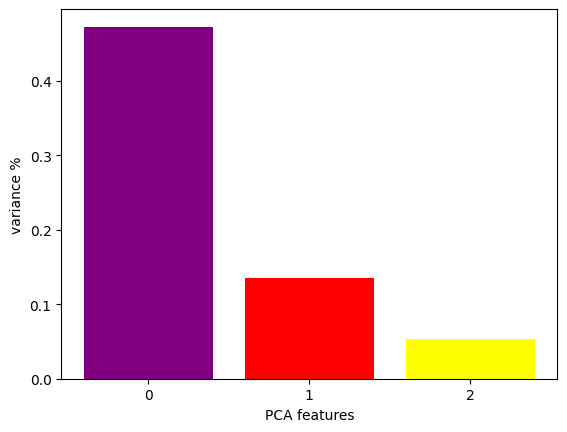

In [3269]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color=('purple','red','yellow'))
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
print(features)

## Save components to a DataFrame

In [3270]:
PCA_components = pd.DataFrame(pca_Components)
PCA_components.columns = ['PC-1','PC-2','PC-3']
PCA_components


,PC-1,PC-2,PC-3
0,0.812098,0.291685,-0.019770
1,0.740488,0.071332,0.037103
2,0.740491,0.071324,0.037075
3,0.625274,-0.234729,0.120526
4,0.599356,-0.367848,-0.087349
...,...,...,...
3441,-0.389504,-0.121469,-0.133804
3442,-0.369084,-0.179868,-0.037404
3443,-0.364247,-0.055252,-0.128433
3444,-0.381913,-0.128185,-0.117285


## Converting the dataframe into a numpy array

In [3271]:
dataset = df.to_numpy()
print(dataset,dataset.shape)

[[0.         0.04481793 0.1254902  ... 0.6185567  0.44533762 1.        ]
 [0.         0.         0.         ... 0.40206186 0.30546624 1.        ]
 [0.         0.         0.         ... 0.40206186 0.30546624 1.        ]
 ...
 [0.0660793  0.         0.05882353 ... 0.05154639 0.18810289 0.        ]
 [0.21145374 0.         0.         ... 0.04123711 0.12379421 0.        ]
 [0.         0.         0.12745098 ... 0.04123711 0.06270096 0.        ]] (3446, 58)


## Separating the features of the dataset as the X variable

In [3272]:
X = dataset[:,:57]
print(X,X.shape)

[[0.         0.04481793 0.1254902  ... 0.47337685 0.6185567  0.44533762]
 [0.         0.         0.         ... 0.43576091 0.40206186 0.30546624]
 [0.         0.         0.         ... 0.43576091 0.40206186 0.30546624]
 ...
 [0.0660793  0.         0.05882353 ... 0.06939196 0.05154639 0.18810289]
 [0.21145374 0.         0.         ... 0.02524906 0.04123711 0.12379421]
 [0.         0.         0.12745098 ... 0.04294057 0.04123711 0.06270096]] (3446, 57)


## Separating the labels of the dataset as the y variable

In [3273]:
y = dataset[:,57]
print(y,y.shape)

[1. 1. 1. ... 0. 0. 0.] (3446,)


## Splitting the dataset with a 20/80 data split

In [3274]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2)

print("\ntrain data :\n",X_train,X_train.shape)
print("\ntest data :\n",X_test,X_test.shape)
print("\ntrain target :\n",y_train,y_train.shape)
print("\ntest target :",y_test,y_test.shape)


train data :
 [[0.         0.         0.         ... 0.20611474 0.09278351 0.06913183]
 [0.         0.         0.30588235 ... 0.12882171 0.02061856 0.03215434]
 [0.         0.         0.28823529 ... 0.34352456 0.32989691 0.2829582 ]
 ...
 [0.         0.         0.         ... 0.27361731 0.17525773 0.26527331]
 [0.17400881 0.         0.15490196 ... 0.02851254 0.03092784 0.0659164 ]
 [0.25770925 0.         0.         ... 0.16592236 0.09278351 0.09324759]] (2756, 57)

test data :
 [[0.         0.         0.         ... 0.         0.         0.00482315]
 [0.         0.         0.         ... 0.         0.         0.03376206]
 [0.         0.         0.         ... 0.12710409 0.10309278 0.07395498]
 ...
 [0.         0.         0.         ... 0.68704912 0.96907216 0.27170418]
 [0.         0.         0.04117647 ... 0.24922707 0.55670103 0.40836013]
 [0.06828194 0.         0.06078431 ... 0.02043971 0.03092784 0.07395498]] (690, 57)

train target :
 [0. 0. 1. ... 0. 0. 1.] (2756,)

test target 

## Passing the PCA performed data to the new variables

In [3275]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Decision Tree Classifier Model

In [3276]:
model = DecisionTreeClassifier()

## Performing hyperparameter tuning

In [3277]:
# Define the hyperparameter grid
param_grid = {
    "max_depth": [2, 4, 6, 8, 10],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score:  0.823297561745443


## Passing the above mentioned parameters to model 

In [3278]:
model = grid_search.best_estimator_

## Training the model

In [3279]:
model.fit(X_train_pca,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)

## Predicting 

In [3280]:
y_predict = model.predict(X_test_pca)

In [3281]:
print("actual target :",y_test)
print("predicted target :",y_predict)

actual target : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0

## Model accuracy

In [3282]:
# Model Validation Accuracy
accuracy = accuracy_score(y_test,y_predict)
print("accuracy : ",accuracy)

# Model Confusion Matrix
conf_mat = confusion_matrix(y_test, y_predict)
print("\nconfusion matrix : \n",conf_mat)

# Model Classification Report
clf_report = classification_report(y_test, y_predict)
print("\nClassification Report : ")
print(clf_report)

# Model Cross Validation Score
score = cross_val_score(model, X, y, cv=3)
print("\nCross Validation Score : ",score)

accuracy :  0.8057971014492754

confusion matrix : 
 [[384  68]
 [ 66 172]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       452
         1.0       0.72      0.72      0.72       238

    accuracy                           0.81       690
   macro avg       0.79      0.79      0.79       690
weighted avg       0.81      0.81      0.81       690


Cross Validation Score :  [0.87989556 0.91035683 0.84320557]


## K Nearest Neighbour Classifier Model

In [3283]:
model_K = KNeighborsClassifier()

## Performing hyperparameter tuning

In [3284]:
# Define the parameter grid for tuning the hyperparameters
param_grid_K = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Create a GridSearchCV object to tune the hyperparameters using cross-validation
grid_search_K = GridSearchCV(model_K, param_grid_K, cv=5)
grid_search_K.fit(X_train_pca, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search_K.best_params_)
print("Best score: ", grid_search_K.best_score_)

Best parameters:  {'n_neighbors': 9, 'weights': 'distance'}
Best score:  0.8465168731423761


## Passing the above mentioned parameters to model 

In [3285]:
model_K = grid_search_K.best_estimator_

## Training the Model

In [3286]:
model_K.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

## Predicting 

In [3287]:
y_predict_K = model_K.predict(X_test_pca)

In [3288]:
print("actual target :",y_test)
print("predicted target :",y_predict_K)

actual target : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0

## Model accuracy

In [3289]:
# Model Validation Accuracy
accuracy = accuracy_score(y_test,y_predict_K)
print("accuracy : ",accuracy)

# Model Confusion Matrix
conf_mat = confusion_matrix(y_test, y_predict_K)
print("\nconfusion matrix : \n",conf_mat)

# Model Classification Report
clf_report = classification_report(y_test, y_predict_K)
print("\nClassification Report : ")
print(clf_report)

# Model Cross Validation Score
score = cross_val_score(model_K, X, y, cv=3)
print("\nCross Validation Score : ",score)

accuracy :  0.8376811594202899

confusion matrix : 
 [[399  53]
 [ 59 179]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       452
         1.0       0.77      0.75      0.76       238

    accuracy                           0.84       690
   macro avg       0.82      0.82      0.82       690
weighted avg       0.84      0.84      0.84       690


Cross Validation Score :  [0.87119234 0.86858138 0.80313589]
